## Import Statements

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

c:\Users\jslon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Functions

In [3]:
def GetReading(filename: str):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,8)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

In [4]:
#Same as old meter setup, but with 20dBm in attenuated by 10dB, no amplifying, det646
def LoopMeterRead(ver: str):
  valsarray = []
  metervals = ['0000','0100','0200','0300','0400','0500','0600','0700','0800','0900']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv2(ver: str):
  valsarray = []
  metervals = ['0000','0050','0100','0150','0200','0250','0300','0350','0400','0450','0500','0550','0600','0650','0700','0750','0800','0850','0900','0950','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv3(ver: str):
  valsarray = []
  metervals = ['0000','0025','0050','0075','0100','0125','0150','0175','0200','0225','0250','0275','0300','0325','0350','0375','0400','0425','0450','0475','0500','0525','0550','0575','0600','0625','0650','0675','0700','0725','0750','0775','0800','0825','0850','0875','0900','0925','0950','0975','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

In [5]:
def checkscatter(filename: str, alpha=0.01):
  dftest = pd.read_csv(filename,skiprows=list(range(0,8)))
  dftest = dftest.drop(columns=['Unit','Range Digits','Disp Digits','Math','Start Group','Limit1 High','Limit1 Low','Limit2 High','Limit2 Low','Terminal','Questionable','Origin','Channel','CH Label'])
  time = dftest['Relative Time'].values
  reading = dftest['Reading'].values
  plt.scatter(time,reading,alpha=alpha)
  plt.xlabel('Time')
  plt.ylabel('Reading')
  plt.title(filename.rstrip('.csv'))
  plt.show()

In [6]:
#Meterval0000v4.csv
#Meterval0100v3.csv
#Meterval0000v1.csv v1 all have issues
#Meterval0400v5.csv

In [7]:
#checkscatter('Meterval0400v5.csv',alpha=0.01)

## Sample Rates Cont.

I am taking samples from the simple circuit with the microwave source running directly to the detector and then to the DMM with varying sample rates

In [8]:
vals740 = GetReading('BasicCircuit740v1.csv')
vals21000 = GetReading('BasicCircuit21000v1.csv')

In [9]:
mean740 = np.abs(np.mean(vals740))
std740 = np.abs(np.std(vals740))
stdp740 = 100*std740/mean740

print(f'For Sampling Rate 740/s:')
print(f'Mean = {round(mean740,5)}')
print(f'Std = {round(std740,10)}')
print(f'% Std = {round(stdp740,5)}')
print('')

mean21000 = np.abs(np.mean(vals21000))
std21000 = np.abs(np.std(vals21000))
stdp21000 = 100*std21000/mean21000

print(f'For Sampling Rate 21000/s:')
print(f'Mean = {round(mean21000,5)}')
print(f'Std = {round(std21000,10)}')
print(f'% Std = {round(stdp21000,5)}')
print('')

For Sampling Rate 740/s:
Mean = 0.02294
Std = 4.579e-06
% Std = 0.01996

For Sampling Rate 21000/s:
Mean = 0.02291
Std = 1.30065e-05
% Std = 0.05678



Again, the slower sample rate show significantly less error

In [10]:
#v7 got week3

## Detectors QH relative phase setup

In [11]:
metervals = np.arange(0,1000,100)
metervalsv2 = np.arange(0,1050,50)
metervalsv3 = np.arange(0,1025,25)

I am taking fine measurements of the detector voltages from the output slot of the QH at varying values for the manual phase shifter

In [12]:
#v7 - 646
metervalsarray7 = LoopMeterReadv3('v7')

metermeanvals7 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray7])
meterstdvals7 = np.array([np.abs(np.std(val)) for val in metervalsarray7])
meterstdpvals7 = 100*meterstdvals7/metermeanvals7

#v8 - 647
metervalsarray8 = LoopMeterReadv3('v8')

metermeanvals8 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray8])
meterstdvals8 = np.array([np.abs(np.std(val)) for val in metervalsarray8])
meterstdpvals8 = 100*meterstdvals8/metermeanvals8

#v9 - 648
metervalsarray9 = LoopMeterReadv3('v9')

metermeanvals9 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray9])
meterstdvals9 = np.array([np.abs(np.std(val)) for val in metervalsarray9])
meterstdpvals9 = 100*meterstdvals9/metermeanvals9

#v10 - 645
metervalsarray10 = LoopMeterReadv3('v10')

metermeanvals10 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray10])
meterstdvals10 = np.array([np.abs(np.std(val)) for val in metervalsarray10])
meterstdpvals10 = 100*meterstdvals10/metermeanvals10

This plot shows the error curves, they diverge at two points as the readings go to 0

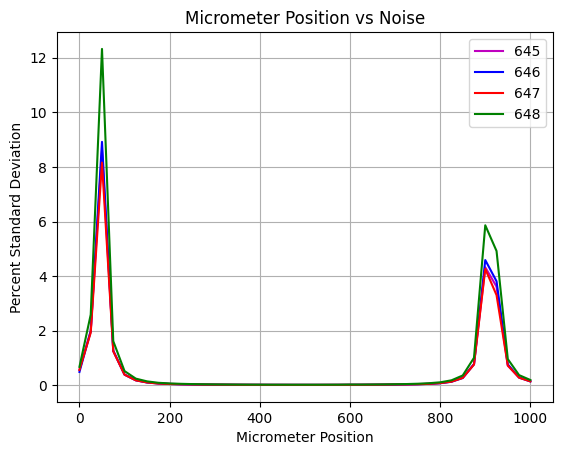

In [13]:
plt.plot(metervalsv3,meterstdpvals10,'-m',label='645')
plt.plot(metervalsv3,meterstdpvals7,'-b',label='646')
plt.plot(metervalsv3,meterstdpvals8,'-r',label='647')
plt.plot(metervalsv3,meterstdpvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.grid()

Here is the same plot zoomed in

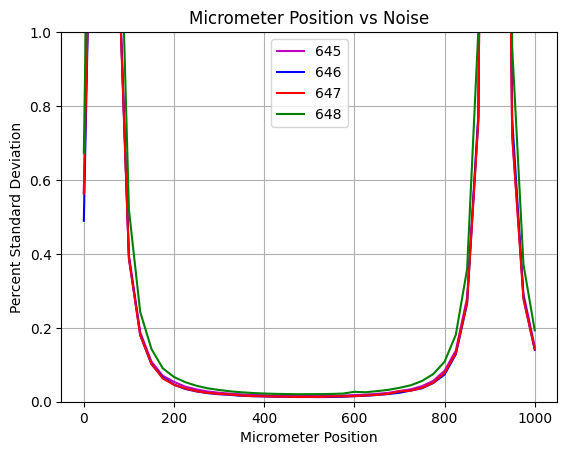

In [14]:
plt.plot(metervalsv3,meterstdpvals10,'-m',label='645')
plt.plot(metervalsv3,meterstdpvals7,'-b',label='646')
plt.plot(metervalsv3,meterstdpvals8,'-r',label='647')
plt.plot(metervalsv3,meterstdpvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.ylim(0,1)
plt.grid()

And zoomed in even more to see the bottom

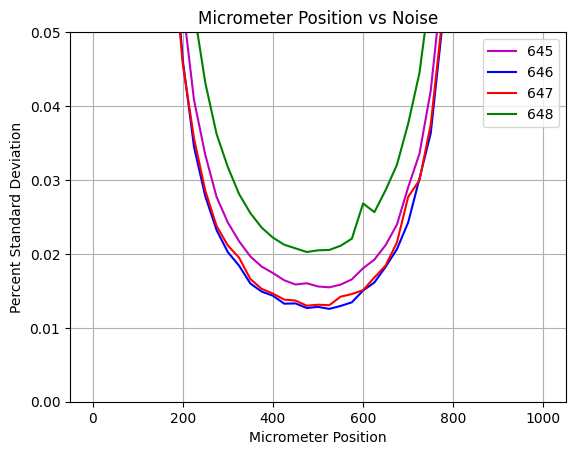

In [15]:
plt.plot(metervalsv3,meterstdpvals10,'-m',label='645')
plt.plot(metervalsv3,meterstdpvals7,'-b',label='646')
plt.plot(metervalsv3,meterstdpvals8,'-r',label='647')
plt.plot(metervalsv3,meterstdpvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Percent Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.ylim(0,0.05)
plt.grid()

Here is the data for the mean detector voltage values

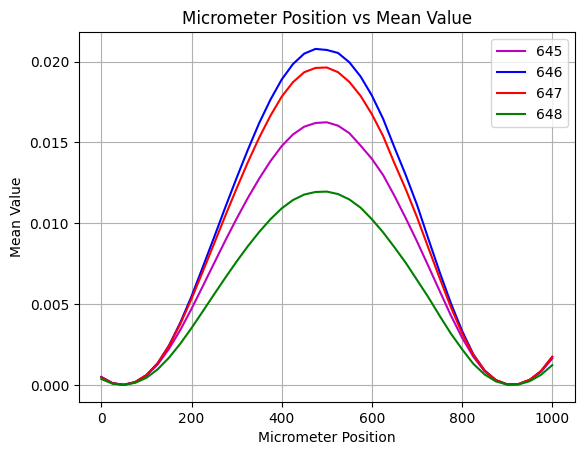

In [16]:
plt.plot(metervalsv3,metermeanvals10,'-m',label='645')
plt.plot(metervalsv3,metermeanvals7,'-b',label='646')
plt.plot(metervalsv3,metermeanvals8,'-r',label='647')
plt.plot(metervalsv3,metermeanvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Mean Value')
plt.title('Micrometer Position vs Mean Value')
plt.legend()
plt.grid()

This plot shows the scalar multiple relations between the mean detector voltage values

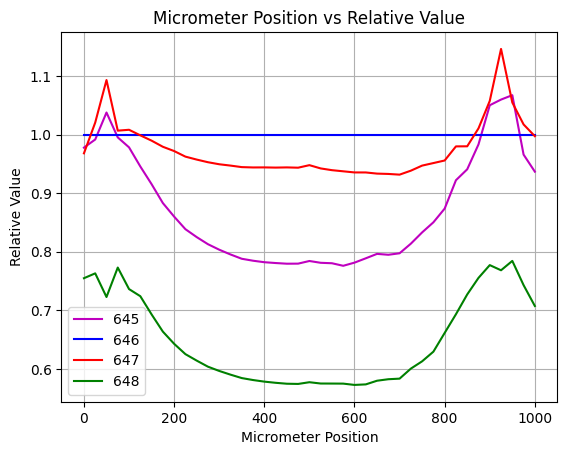

In [17]:
plt.plot(metervalsv3,metermeanvals10/metermeanvals7,'-m',label='645')
plt.plot(metervalsv3,metermeanvals7/metermeanvals7,'-b',label='646')
plt.plot(metervalsv3,metermeanvals8/metermeanvals7,'-r',label='647')
plt.plot(metervalsv3,metermeanvals9/metermeanvals7,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Relative Value')
plt.title('Micrometer Position vs Relative Value')
plt.legend()
plt.grid()

This plot shows the absolute standard deviation

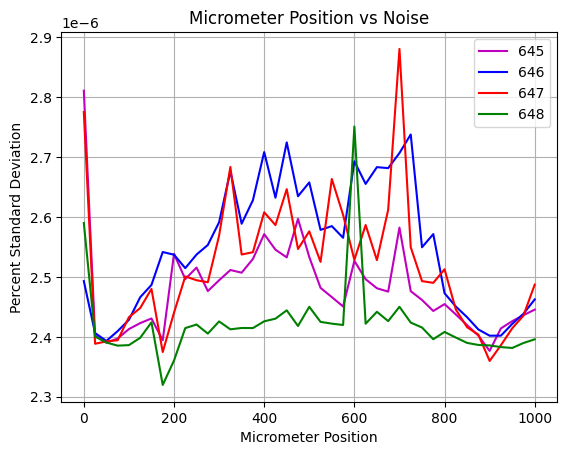

In [18]:
plt.plot(metervalsv3,meterstdvals10,'-m',label='645')
plt.plot(metervalsv3,meterstdvals7,'-b',label='646')
plt.plot(metervalsv3,meterstdvals8,'-r',label='647')
plt.plot(metervalsv3,meterstdvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Standard Deviation')
plt.title('Micrometer Position vs Noise')
plt.legend()
plt.grid()

This shows the distribution of sampled values at a given meter position

(array([1.000e+00, 1.000e+00, 4.000e+00, 7.000e+00, 1.600e+01, 2.600e+01,
        6.800e+01, 9.500e+01, 1.450e+02, 1.990e+02, 2.790e+02, 4.230e+02,
        5.290e+02, 6.560e+02, 8.020e+02, 8.800e+02, 9.710e+02, 1.086e+03,
        1.153e+03, 1.287e+03, 1.275e+03, 1.315e+03, 1.465e+03, 1.466e+03,
        1.617e+03, 1.644e+03, 1.840e+03, 1.912e+03, 2.099e+03, 2.109e+03,
        2.327e+03, 2.237e+03, 2.154e+03, 1.941e+03, 1.744e+03, 1.575e+03,
        1.252e+03, 1.020e+03, 8.400e+02, 5.940e+02, 4.490e+02, 3.520e+02,
        1.980e+02, 1.240e+02, 7.900e+01, 5.100e+01, 2.700e+01, 1.200e+01,
        7.000e+00, 6.000e+00]),
 array([-0.0207234 , -0.02072306, -0.02072271, -0.02072237, -0.02072203,
        -0.02072169, -0.02072134, -0.020721  , -0.02072066, -0.02072032,
        -0.02071997, -0.02071963, -0.02071929, -0.02071895, -0.0207186 ,
        -0.02071826, -0.02071792, -0.02071758, -0.02071723, -0.02071689,
        -0.02071655, -0.02071621, -0.02071586, -0.02071552, -0.02071518,
        -0.

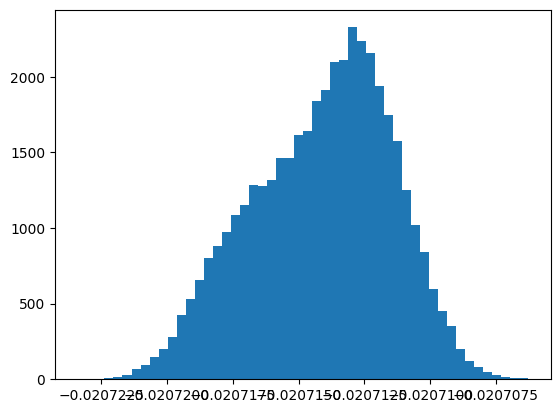

In [19]:
plt.hist(metervalsarray7[20],bins=50)

This plot zooms into the mean detector voltage values as the approach zero

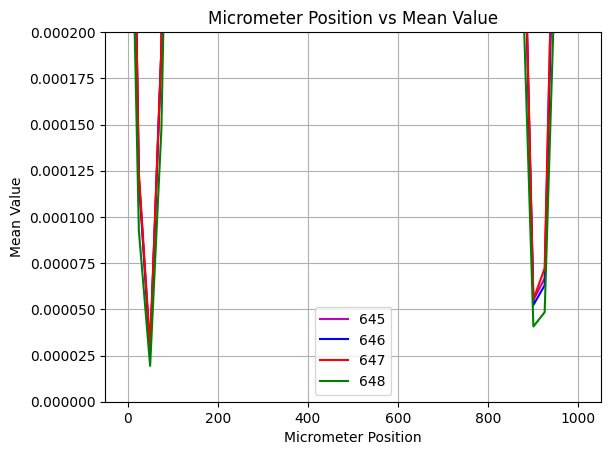

In [20]:
plt.plot(metervalsv3,metermeanvals10,'-m',label='645')
plt.plot(metervalsv3,metermeanvals7,'-b',label='646')
plt.plot(metervalsv3,metermeanvals8,'-r',label='647')
plt.plot(metervalsv3,metermeanvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Mean Value')
plt.title('Micrometer Position vs Mean Value')
plt.legend()
plt.ylim(0,0.0002)
plt.grid()

In [21]:
#50 Ohm Measure
#Email Herotek
